In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sklearn.metrics as metrics

import numpy as np
import random
import math
import os
from datetime import datetime

import DataGenerator as DG
from DataGenerator import DataGenerator

import matplotlib.pyplot as plt

import h5py

###FIX NUMPY LOAD FOR DICTIONARIES
np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

In [43]:
filepath = "images_synthetic_mouse.h5"
with h5py.File(filepath,'r') as f:
    print(len(f["/labels"]))

1079462


60


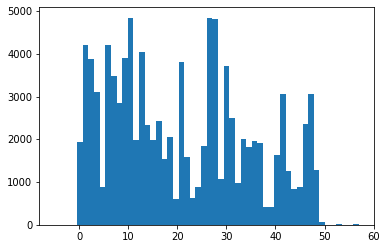

TypeError: only integer scalar arrays can be converted to a scalar index

In [12]:
with h5py.File(filepath,'r') as f:
    print(len(np.unique(f["/labels"])))
    depth = 10
    data_gen = DataGenerator(filepath,data_amount=100000,batch_size=int(100000/depth),frames_per_sample=depth,offset=0,sliding_window=1)
    subset = f["/labels"][0:100000]
    plt.hist(subset,len(np.unique(subset)))
    plt.show()
    lbl = np.array([0],dtype='uint8')
    for i in range(0,10):
        dat,lbl2 = data_gen.__getitem__(i)
        lbl=np.concatenate(lbl,lbl2)
    plt.hist(lbl,len(np.unique(lbl)))
    plt.show()
    print(np.unique(lbl,return_counts=True))

In [14]:
from distutils.sysconfig import get_python_lib
print(get_python_lib())

/home/g17amitprasad_gmail_com/miniconda3/envs/tf2_gpu/lib/python3.6/site-packages


In [14]:
x= 0
' ' + str((x>0)) + ' ' + str(x)

' False 0'

In [3]:
def create_sbatch(outdir = 'training',
                  job_name='train',
                  cores=16,
                  mem='48GB',
                  max_time='120:00:00',
                  num_gpus=1,
                  data_file = 'images_synthetic_mouse.h5',
                  data_amount = 0,
                  data_offset = 0,
                  validation_amount = 0,
                  validation_offset = 0,
                  batch_size = 8,
                  verbosity = 1,
                  epochs = 40,
                  dropout_chance = 0,
                  frames_per_sample = 10
                 ):
    cmd = 'sbatch '
    cmd += '--job-name ' + job_name + ' '
    cmd += '--output "' + os.getcwd() + '/train-%j.log" '
    cmd += '--partition debug '
    cmd += '-n ' + str(cores) + ' '
    cmd += '--mem ' + mem + ' '
    cmd += '--time ' + max_time + ' '
    cmd += '--gres gpu:' + str(num_gpus) + ' '
    cmd += '--wrap="' + os.path.expanduser("~") + '/miniconda3/envs/tf2_gpu/bin/python train_model.py train '
    cmd += '--data-amount ' + str(data_amount) + ' '
    cmd += '--data-offset ' + str(data_offset) + ' '
    cmd += '--validation-amount ' + str(validation_amount) + ' '
    cmd += '--validation-offset ' + str(validation_offset) + ' '
    cmd += '--batch-size ' + str(batch_size) + ' '
    cmd += '--verbosity ' + str(verbosity) + ' '
    cmd += '--epochs ' + str(epochs) + ' '
    cmd += '--depth ' + str(frames_per_sample) + ' '
    cmd += '--dropout ' + str(dropout_chance) + ' '
    cmd += "'" + os.getcwd() + '/' + data_file +"' "
    cmd += "'" + os.getcwd() + '/' + outdir + datetime.today().strftime('-%Y-%m-%d-%H-%M')+ '/' +"' "
    cmd += '"'
    return cmd
print(create_sbatch(outdir='training',
              data_amount = 800000,
              data_offset = 0,
              validation_amount=10000,
              validation_offset=810000,
              dropout_chance=0.1,
              epochs=50,
              verbosity=1))

sbatch --job-name train --output "/home/g17amitprasad_gmail_com/2019-notebooks/Action Recognition/train-%j.log" --partition debug -n 16 --mem 48GB --time 120:00:00 --gres gpu:1 --wrap="/home/g17amitprasad_gmail_com/miniconda3/envs/tf2_gpu/bin/python train_model.py train --data-amount 800000 --data-offset 0 --validation-amount 10000 --validation-offset 810000 --batch-size 8 --verbosity 1 --epochs 50 --depth 10 --dropout 0.1 '/home/g17amitprasad_gmail_com/2019-notebooks/Action Recognition/images_synthetic_mouse.h5' '/home/g17amitprasad_gmail_com/2019-notebooks/Action Recognition/training-2019-08-01-22-19/' "
